# 9. Decision Tree Regression
## Concept:
1. Splits the feature space into regions with simple predictions (means).

## When to use:
1. When you want a non-linear, non-parametric model.

2. Data has complex interactions or mixed types.

3. When interpretability via tree structure is important.

## When not to use:
1. Can overfit easily without pruning.

2. Sensitive to small data variations.

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/final_student_data.csv")  # Or use any built-in dataset
df.head()

Mounted at /content/drive


,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [4]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df['total']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: -0.018699547877119915
MSE: 1965.3761208897342


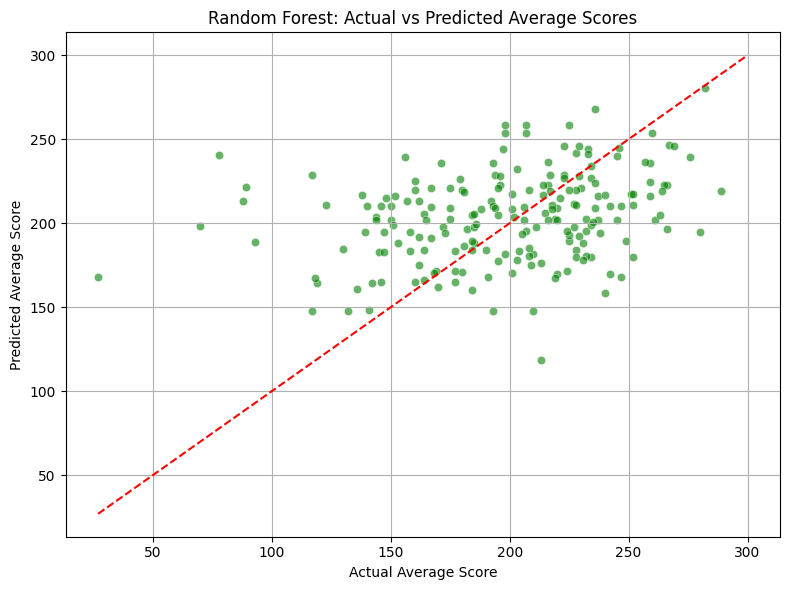

In [9]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Random Forest: Actual vs Predicted Average Scores")
plt.grid(True)
plt.tight_layout()
plt.show()